In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [5]:
def expand(train):
    train[['p1','p2']] = train['PassengerId'].str.split('_',expand=True)
    train['p1'] = train['p1'].astype(int)
    train['p2'] = train['p2'].astype(int)
    return train
trian = expand(train)
test = expand(test)
train[['p1','p2']].head()

,p1,p2
0,1,1
1,2,1
2,3,1
3,3,2
4,4,1


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,p1,p2
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,4633.389624,1.517773
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2671.028856,1.054241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,6883.000000,2.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000


In [7]:
#train['p1'] = np.log(train['p1'])/np.log(20)
#test['p1'] = np.log(test['p1'])/np.log(20)

train = train.drop('p1',axis=1)
test = test.drop('p1',axis=1)

In [8]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,p2
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1


In [9]:
import matplotlib.pyplot as plt
'''
fig, ax = plt.subplots(3, 2, figsize=(10,10))
bin_size=100
ax = ax.ravel()

columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','PassengerId']

for i, column in enumerate(columns):
    ax[i].hist(train[column],bins=bin_size)
    ax[i].set_title(column)

plt.tight_layout()
plt.show()
'''

"\nfig, ax = plt.subplots(3, 2, figsize=(10,10))\nbin_size=100\nax = ax.ravel()\n\ncolumns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','PassengerId']\n\nfor i, column in enumerate(columns):\n    ax[i].hist(train[column],bins=bin_size)\n    ax[i].set_title(column)\n\nplt.tight_layout()\nplt.show()\n"

<AxesSubplot:>

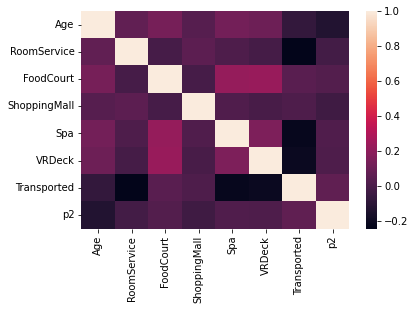

In [10]:
import seaborn as sns
sns.heatmap(train.corr())

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  p2            8693 non-null   int64  
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 959.4+ KB


In [12]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,p2
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1.517773
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,1.054241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,2.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,8.000000


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def preparedata(df):
    df[['cabin_1','cabin_2','cabin_3']] = df['Cabin'].str.split('/', expand=True, n=2)
    df = df.drop(['Cabin','cabin_2'],axis=1)
    
    '''
    columns_to_bin = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

    # Bin the columns into 10 bins by percentile
    for col in columns_to_bin:
        df[col] = pd.qcut(df[col], q=10, labels=False, duplicates='drop')
    '''
    
    # create new columns for first and last name
    df['first_initial'] = df['Name'].str.split().str[0].str[0]
    df['last_initial'] = df['Name'].str.split().str[-1].str[0]

    # drop the original name column
    df = df.drop(columns=['Name'])
    
    
    #Treating NaN values
    object_cols = df.select_dtypes(include='object').columns
    float64_cols = df.select_dtypes(include='float64').columns
    for col in object_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    for col in float64_cols:
        df[col].fillna(df[col].median(), inplace=True)
    
    for i in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
        df[i] = np.where(df[i]<=1, df[i], np.log(df[i]+0.0001)/np.log(20))

        
        
    if 'Transported' in df.columns:
        temp_x = df.drop(['PassengerId','Transported'],axis=1)
        temp_y = df[['Transported']]
    else:
        temp_x = df.drop(['PassengerId'],axis=1)
        temp_y = None
    temp_x = pd.get_dummies(temp_x, columns=temp_x.select_dtypes(include='object').columns, prefix=temp_x.select_dtypes(include='object').columns)
    return temp_x,temp_y
X_train,Y_train = preparedata(train)
X_test,Y_test = preparedata(test)

In [14]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,p2,HomePlanet_Earth,...,last_initial_O,last_initial_P,last_initial_Q,last_initial_R,last_initial_S,last_initial_T,last_initial_U,last_initial_V,last_initial_W,last_initial_Y
0,False,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,...,1,0,0,0,0,0,0,0,0,0
1,False,24.0,False,1.566011,0.733455,1.074488,2.105695,1.263194,1,1,...,0,0,0,0,0,0,0,1,0,0
2,False,58.0,True,1.255520,2.731219,0.000000,2.941551,1.299122,1,0,...,0,0,0,0,1,0,0,0,0,0
3,False,33.0,False,0.000000,2.389051,1.974877,2.707327,1.756729,2,0,...,0,0,0,0,1,0,0,0,0,0
4,False,16.0,False,1.907291,1.418183,1.674809,2.115284,0.231395,1,1,...,0,0,0,0,1,0,0,0,0,0


In [15]:
X_train.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'p2', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'cabin_1_A',
       'cabin_1_B', 'cabin_1_C', 'cabin_1_D', 'cabin_1_E', 'cabin_1_F',
       'cabin_1_G', 'cabin_1_T', 'cabin_3_P', 'cabin_3_S', 'first_initial_A',
       'first_initial_B', 'first_initial_C', 'first_initial_D',
       'first_initial_E', 'first_initial_F', 'first_initial_G',
       'first_initial_H', 'first_initial_I', 'first_initial_J',
       'first_initial_K', 'first_initial_L', 'first_initial_M',
       'first_initial_N', 'first_initial_O', 'first_initial_P',
       'first_initial_Q', 'first_initial_R', 'first_initial_S',
       'first_initial_T', 'first_initial_U', 'first_initial_V',
       'first_initial_W', 'first_initial_Y', 'first_initial_Z',
       'last_initial_A', 'last_initial_B', 'last_initial_C',

In [16]:
'''

#Removing Outliers

print(X_train.shape)

from sklearn.neighbors import LocalOutlierFactor

# Create an instance of LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=100, contamination='auto')

# Fit the model on X_train
lof.fit(X_train)

# Get the outlier scores
scores = lof.negative_outlier_factor_

# Get the indices of the observations that are not outliers
good_indices = np.where(scores > -2)[0]

# Get the new X_train without outliers
X_train = X_train.iloc[good_indices, :]
Y_train = Y_train.iloc[good_indices, :]

print(X_train.shape)
'''

"\n\n#Removing Outliers\n\nprint(X_train.shape)\n\nfrom sklearn.neighbors import LocalOutlierFactor\n\n# Create an instance of LocalOutlierFactor\nlof = LocalOutlierFactor(n_neighbors=100, contamination='auto')\n\n# Fit the model on X_train\nlof.fit(X_train)\n\n# Get the outlier scores\nscores = lof.negative_outlier_factor_\n\n# Get the indices of the observations that are not outliers\ngood_indices = np.where(scores > -2)[0]\n\n# Get the new X_train without outliers\nX_train = X_train.iloc[good_indices, :]\nY_train = Y_train.iloc[good_indices, :]\n\nprint(X_train.shape)\n"

In [17]:
Y_train = np.array(Y_train).ravel()

In [18]:
#Decision Tree Classifier

'''
from sklearn.tree import DecisionTreeClassifier
param_grid_dtc = {'random_state':[123],'max_depth':[None],'splitter':['best'],'criterion':['gini', 'entropy'],'max_features':['auto','sqrt','log2',None],'ccp_alpha':[1e-2,1e-3]}
dtc=DecisionTreeClassifier()
gr=GridSearchCV(dtc,param_grid=param_grid_dtc)
gr.fit(X_train,Y_train)
y_pred = gr.predict(X_train)
y_pred
'''

"\nfrom sklearn.tree import DecisionTreeClassifier\nparam_grid_dtc = {'random_state':[123],'max_depth':[None],'splitter':['best'],'criterion':['gini', 'entropy'],'max_features':['auto','sqrt','log2',None],'ccp_alpha':[1e-2,1e-3]}\ndtc=DecisionTreeClassifier()\ngr=GridSearchCV(dtc,param_grid=param_grid_dtc)\ngr.fit(X_train,Y_train)\ny_pred = gr.predict(X_train)\ny_pred\n"

In [19]:
#RandomForestClassifier

'''
from sklearn.ensemble import RandomForestClassifier
param_grid_rfc = {'n_estimators':[1000],'criterion':['gini','entorpy','log_loss'],'max_features':['sqrt','log2',None],'ccp_alpha':[1e-2,1e-3]}
rfc=RandomForestClassifier()
gr=GridSearchCV(rfc,param_grid=param_grid_rfc)
gr.fit(X_train,Y_train)
y_pred = gr.predict(X_train)
y_pred
'''

"\nfrom sklearn.ensemble import RandomForestClassifier\nparam_grid_rfc = {'n_estimators':[1000],'criterion':['gini','entorpy','log_loss'],'max_features':['sqrt','log2',None],'ccp_alpha':[1e-2,1e-3]}\nrfc=RandomForestClassifier()\ngr=GridSearchCV(rfc,param_grid=param_grid_rfc)\ngr.fit(X_train,Y_train)\ny_pred = gr.predict(X_train)\ny_pred\n"

In [20]:
from sklearn.ensemble import GradientBoostingClassifier


'''
Define the parameter grid for GridSearchCV
param_grid = {
    'loss':['deviance'],
    'criterion':['friedman_mse'],
    'n_estimators': [300],
    'learning_rate': [0.05],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'subsample': [0.6,0.7,0.8],
    'validation_fraction':[0.1]
}

# Initialize the GradientBoostingClassifier
gbc = GradientBoostingClassifier()

# Initialize the GridSearchCV object
gr = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
gr.fit(X_train, Y_train)

# Print the best parameters and score
print("Best parameters: ", gr.best_params_)
print("Best score: ", gr.best_score_)
'''

'\nDefine the parameter grid for GridSearchCV\nparam_grid = {\n    \'loss\':[\'deviance\'],\n    \'criterion\':[\'friedman_mse\'],\n    \'n_estimators\': [300],\n    \'learning_rate\': [0.05],\n    \'min_samples_split\': [2],\n    \'min_samples_leaf\': [2],\n    \'subsample\': [0.6,0.7,0.8],\n    \'validation_fraction\':[0.1]\n}\n\n# Initialize the GradientBoostingClassifier\ngbc = GradientBoostingClassifier()\n\n# Initialize the GridSearchCV object\ngr = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5)\n\n# Fit the GridSearchCV object to the data\ngr.fit(X_train, Y_train)\n\n# Print the best parameters and score\nprint("Best parameters: ", gr.best_params_)\nprint("Best score: ", gr.best_score_)\n'

In [21]:
'''
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the stacking classifier
stack_clf = StackingClassifier(estimators=[('gb', GradientBoostingClassifier()), ('lr', LogisticRegression())])

# Define the parameter grid for grid search
param_grid_sc = {
    'gb__loss':['deviance'],
    'gb__criterion':['friedman_mse'],
    'gb__n_estimators': [300],
    'gb__learning_rate': [0.1],
    'gb__min_samples_split': [2],
    'gb__min_samples_leaf': [2],
    'gb__subsample': [0.6],
    'gb__validation_fraction':[0.1],
    'lr__max_iter': [100000]
}

# Perform grid search with cross validation
gr = GridSearchCV(stack_clf, param_grid_sc, cv=5)
gr.fit(X_train, Y_train)

# Make predictions
y_pred = gr.predict(X_train)
'''

"\nfrom sklearn.ensemble import GradientBoostingClassifier, StackingClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the stacking classifier\nstack_clf = StackingClassifier(estimators=[('gb', GradientBoostingClassifier()), ('lr', LogisticRegression())])\n\n# Define the parameter grid for grid search\nparam_grid_sc = {\n    'gb__loss':['deviance'],\n    'gb__criterion':['friedman_mse'],\n    'gb__n_estimators': [300],\n    'gb__learning_rate': [0.1],\n    'gb__min_samples_split': [2],\n    'gb__min_samples_leaf': [2],\n    'gb__subsample': [0.6],\n    'gb__validation_fraction':[0.1],\n    'lr__max_iter': [100000]\n}\n\n# Perform grid search with cross validation\ngr = GridSearchCV(stack_clf, param_grid_sc, cv=5)\ngr.fit(X_train, Y_train)\n\n# Make predictions\ny_pred = gr.predict(X_train)\n"

In [45]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid = {
    'svm__C': [0.1],
    'svm__gamma': ['scale'],
    'svm__kernel': ['rbf','poly'],
    'svm__degree': [5,10]
}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, Y_train)

y_pred = grid.predict(X_train)
gr = grid

In [46]:
gr.best_params_

{'svm__C': 0.1, 'svm__degree': 5, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}

<AxesSubplot:>

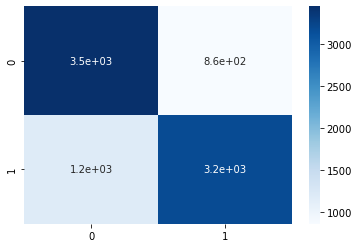

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(Y_train, y_pred)

# Display the confusion matrix using seaborn's heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

In [48]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
acc = accuracy_score(Y_train, y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 76.43%


In [49]:
Y_result = gr.predict(X_test)
Y_result

array([ True, False,  True, ...,  True, False,  True])

In [50]:
X_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,p2,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_1_A,cabin_1_B,cabin_1_C,cabin_1_D,cabin_1_E,cabin_1_F,cabin_1_G,cabin_1_T,cabin_3_P,cabin_3_S,first_initial_A,first_initial_B,first_initial_C,first_initial_D,first_initial_E,first_initial_F,first_initial_G,first_initial_H,first_initial_I,first_initial_J,first_initial_K,first_initial_L,first_initial_M,first_initial_N,first_initial_O,first_initial_P,first_initial_Q,first_initial_R,first_initial_S,first_initial_T,first_initial_U,first_initial_V,first_initial_W,first_initial_Y,first_initial_Z,last_initial_A,last_initial_B,last_initial_C,last_initial_D,last_initial_E,last_initial_F,last_initial_G,last_initial_H,last_initial_I,last_initial_J,last_initial_K,last_initial_L,last_initial_M,last_initial_N,last_initial_O,last_initial_P,last_initial_Q,last_initial_R,last_initial_S,last_initial_T,last_initial_U,last_initial_V,last_initial_W,last_initial_Y
0,True,27.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,False,19.0,False,0.000000,0.733455,0.000000,2.652292,0.000000,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,True,31.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,False,38.0,False,0.000000,2.938404,0.000000,1.735301,2.126896,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,False,20.0,False,0.768625,0.000000,2.154273,0.000000,0.000000,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
result = test.copy()
result['Transported'] = Y_result
result = result[['PassengerId','Transported']]
result.to_csv('submission.csv',index=False)

In [52]:
# get the misclassified records
Y_train_pred = gr.predict(X_train)
misclassified = X_train[Y_train_pred != Y_train]

misclassified.head()


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,p2,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_1_A,cabin_1_B,cabin_1_C,cabin_1_D,cabin_1_E,cabin_1_F,cabin_1_G,cabin_1_T,cabin_3_P,cabin_3_S,first_initial_A,first_initial_B,first_initial_C,first_initial_D,first_initial_E,first_initial_F,first_initial_G,first_initial_H,first_initial_I,first_initial_J,first_initial_K,first_initial_L,first_initial_M,first_initial_N,first_initial_O,first_initial_P,first_initial_Q,first_initial_R,first_initial_S,first_initial_T,first_initial_U,first_initial_V,first_initial_W,first_initial_Y,first_initial_Z,last_initial_A,last_initial_B,last_initial_C,last_initial_D,last_initial_E,last_initial_F,last_initial_G,last_initial_H,last_initial_I,last_initial_J,last_initial_K,last_initial_L,last_initial_M,last_initial_N,last_initial_O,last_initial_P,last_initial_Q,last_initial_R,last_initial_S,last_initial_T,last_initial_U,last_initial_V,last_initial_W,last_initial_Y
0,False,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,False,24.0,False,1.566011,0.733455,1.074488,2.105695,1.263194,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,False,16.0,False,1.907291,1.418183,1.674809,2.115284,0.231395,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,False,44.0,False,0.000000,2.062940,0.000000,1.893802,0.000000,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,False,26.0,False,1.247666,2.449781,0.366737,0.000000,0.000000,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
pd.set_option('display.max_columns', 500) 

In [54]:
misclassified.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,p2,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_1_A,cabin_1_B,cabin_1_C,cabin_1_D,cabin_1_E,cabin_1_F,cabin_1_G,cabin_1_T,cabin_3_P,cabin_3_S,first_initial_A,first_initial_B,first_initial_C,first_initial_D,first_initial_E,first_initial_F,first_initial_G,first_initial_H,first_initial_I,first_initial_J,first_initial_K,first_initial_L,first_initial_M,first_initial_N,first_initial_O,first_initial_P,first_initial_Q,first_initial_R,first_initial_S,first_initial_T,first_initial_U,first_initial_V,first_initial_W,first_initial_Y,first_initial_Z,last_initial_A,last_initial_B,last_initial_C,last_initial_D,last_initial_E,last_initial_F,last_initial_G,last_initial_H,last_initial_I,last_initial_J,last_initial_K,last_initial_L,last_initial_M,last_initial_N,last_initial_O,last_initial_P,last_initial_Q,last_initial_R,last_initial_S,last_initial_T,last_initial_U,last_initial_V,last_initial_W,last_initial_Y
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.0,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.00000,2049.000000,2049.000000,2049.000000
mean,28.129331,0.555074,0.852418,0.708729,0.553976,0.540663,1.482674,0.697413,0.156662,0.145925,0.170815,0.113714,0.715471,0.025378,0.048804,0.056125,0.047828,0.124939,0.298682,0.398243,0.0,0.486091,0.513909,0.110786,0.065886,0.069302,0.055637,0.064422,0.026842,0.046364,0.041972,0.021474,0.056613,0.028795,0.051245,0.061493,0.023426,0.009273,0.027818,0.000488,0.042460,0.071742,0.050268,0.003416,0.020010,0.038555,0.003416,0.008297,0.027818,0.136164,0.101513,0.031235,0.015617,0.044412,0.046852,0.074183,0.007321,0.015129,0.024890,0.031235,0.093704,0.017570,0.014641,0.077111,0.007321,0.042460,0.088824,0.024890,0.00244,0.014641,0.058565,0.001464
std,14.254329,0.836448,1.099362,0.980387,0.817829,0.826693,1.047606,0.459490,0.363570,0.353117,0.376439,0.317541,0.451300,0.157309,0.215511,0.230219,0.213455,0.330730,0.457792,0.489656,0.0,0.499929,0.499929,0.313943,0.248143,0.254029,0.229275,0.245563,0.161662,0.210324,0.200573,0.144993,0.231158,0.167269,0.220550,0.240292,0.151289,0.095871,0.164493,0.022092,0.201685,0.258124,0.218552,0.058363,0.140068,0.192580,0.058363,0.090730,0.164493,0.343046,0.302080,0.173994,0.124020,0.206059,0.211374,0.262132,0.085268,0.122097,0.155828,0.173994,0.291488,0.131413,0.120141,0.266832,0.085268,0.201685,0.284559,0.155828,0.04935,0.120141,0.234866,0.038245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [55]:
X_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,p2,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_1_A,cabin_1_B,cabin_1_C,cabin_1_D,cabin_1_E,cabin_1_F,cabin_1_G,cabin_1_T,cabin_3_P,cabin_3_S,first_initial_A,first_initial_B,first_initial_C,first_initial_D,first_initial_E,first_initial_F,first_initial_G,first_initial_H,first_initial_I,first_initial_J,first_initial_K,first_initial_L,first_initial_M,first_initial_N,first_initial_O,first_initial_P,first_initial_Q,first_initial_R,first_initial_S,first_initial_T,first_initial_U,first_initial_V,first_initial_W,first_initial_Y,first_initial_Z,last_initial_A,last_initial_B,last_initial_C,last_initial_D,last_initial_E,last_initial_F,last_initial_G,last_initial_H,last_initial_I,last_initial_J,last_initial_K,last_initial_L,last_initial_M,last_initial_N,last_initial_O,last_initial_P,last_initial_Q,last_initial_R,last_initial_S,last_initial_T,last_initial_U,last_initial_V,last_initial_W,last_initial_Y
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,0.585672,0.642739,0.543087,0.621970,0.594979,1.517773,0.552514,0.245140,0.202347,0.207063,0.091568,0.701369,0.029449,0.089612,0.085931,0.054987,0.100771,0.344300,0.294375,0.000575,0.483838,0.516162,0.128839,0.056827,0.073853,0.051076,0.053721,0.024272,0.053146,0.039572,0.018866,0.046474,0.029794,0.049810,0.066490,0.024848,0.009433,0.033820,0.002531,0.039687,0.075463,0.057978,0.001956,0.015300,0.034280,0.005062,0.006902,0.031520,0.128609,0.098585,0.041988,0.018061,0.052456,0.044404,0.065225,0.013804,0.014724,0.024963,0.027493,0.078569,0.015760,0.016105,0.079719,0.004486,0.041988,0.100541,0.023467,0.008973,0.014609,0.051076,0.002876
std,14.341404,0.907929,0.978862,0.857765,0.924433,0.917011,1.054241,0.497263,0.430195,0.401772,0.405224,0.288432,0.457684,0.169071,0.285642,0.280279,0.227968,0.301042,0.475167,0.455787,0.023977,0.499767,0.499767,0.335041,0.231526,0.261546,0.220165,0.225480,0.153902,0.224338,0.194963,0.136059,0.210522,0.170029,0.217565,0.249151,0.155669,0.096669,0.180777,0.050246,0.195234,0.264152,0.233715,0.044181,0.122749,0.181959,0.070968,0.082796,0.174727,0.334786,0.298121,0.200573,0.133178,0.222958,0.206002,0.246936,0.116684,0.120455,0.156020,0.163525,0.269080,0.124552,0.125886,0.270874,0.066834,0.200573,0.300737,0.151391,0.094304,0.119990,0.220165,0.053553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [33]:
cols = pd.DataFrame([X_train.columns,gr.best_estimator_.named_estimators_['gb'].feature_importances_])\
.transpose()\
.rename({0:'Column',1:'Importance'},axis=1)\
.set_index('Column')\
.sort_values('Importance',ascending=False).head(30).index

AttributeError: 'Pipeline' object has no attribute 'named_estimators_'

In [ ]:
P = misclassified[cols].describe()/X_train[cols].describe().drop('count',axis=0)

# calculate the percentage of NaN values in each row
null_counts = P.isna().sum(axis=1)
null_percent = null_counts / P.shape[1]

# drop rows where more than 75% of the values are NaN
P = P[null_percent <= 0.75]

sns.heatmap(P.iloc[:, :10])